## Iperf Analysis

In [38]:
# importing packages

import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)

In [55]:
# dataframes initialization

csv_folder = "../csv"
c_file_path = f"{csv_folder}/iperf_test-c.csv"
vm_file_path = f"{csv_folder}/iperf_test-vm.csv"

c_df = pd.read_csv(c_file_path)
vm_df = pd.read_csv(vm_file_path)


unique_intervals = c_df['interval'].unique()
interval_mapping = {interval: idx for idx, interval in enumerate(unique_intervals)}
c_df['interval'] = c_df['interval'].map(interval_mapping)
vm_df['interval'] = vm_df['interval'].map(interval_mapping)

c_df = c_df.drop(columns=['timestamp', 'server_ip', 'server_port', 'client_ip', 'client_port', 'tag_id', 'run'])
vm_df = vm_df.drop(columns=['timestamp', 'server_ip', 'server_port', 'client_ip', 'client_port', 'tag_id', 'run'])

c_df = c_df.groupby('interval').agg(['mean', 'std']).reset_index()
vm_df = vm_df.groupby('interval').agg(['mean', 'std']).reset_index()
c_df = c_df[c_df['interval'] != 30]
vm_df = vm_df[vm_df['interval'] != 30]

In [56]:
c_df.head()

interval   transferred                   bandwidth              
                    mean           std          mean           std
0        0  1.233705e+10  8.838328e+07  9.869638e+10  7.070662e+08
1        1  1.251900e+10  5.797848e+07  1.001520e+11  4.638278e+08
2        2  1.243449e+10  1.546984e+08  9.947589e+10  1.237587e+09
3        3  1.242696e+10  1.091651e+08  9.941570e+10  8.733210e+08
4        4  1.250133e+10  1.174916e+08  1.000107e+11  9.399326e+08

## Comparison

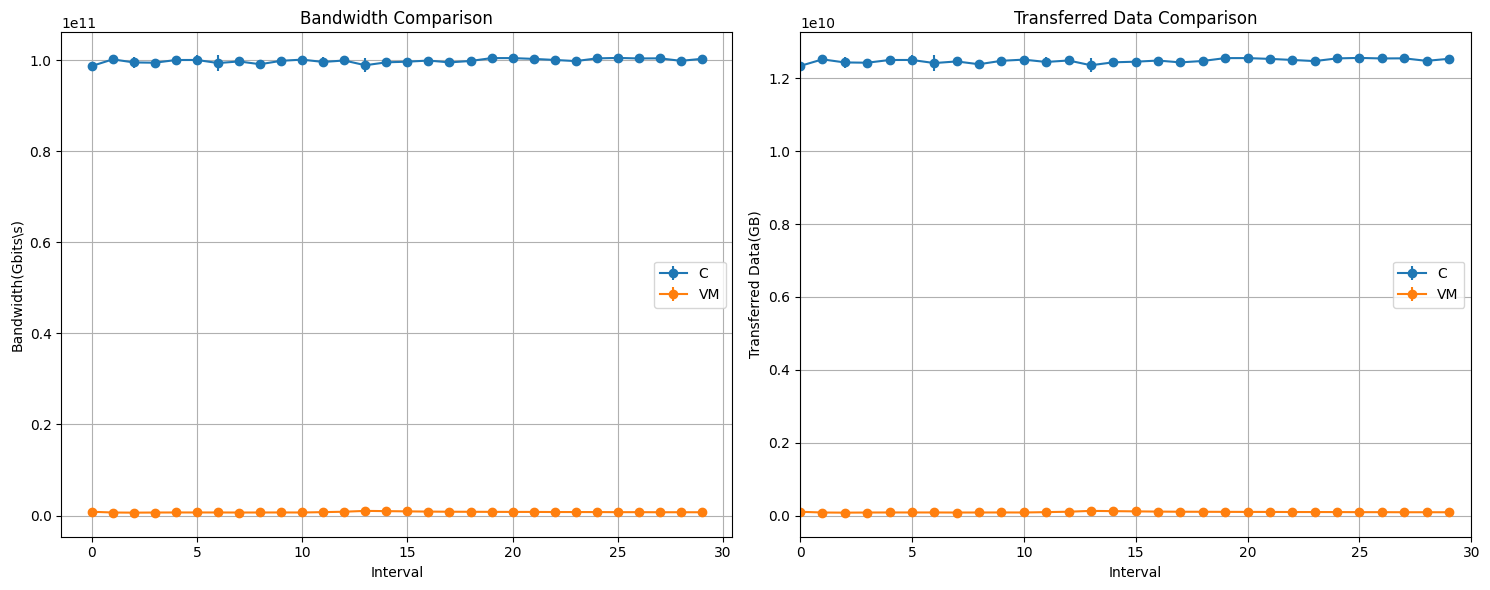

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# First plot: Bandwidth comparison
axes[0].errorbar(c_df['interval'], c_df[('bandwidth', 'mean')], yerr=c_df[('bandwidth', 'std')], label='C', fmt='-o')
axes[0].errorbar(vm_df['interval'], vm_df[('bandwidth', 'mean')], yerr=vm_df[('bandwidth', 'std')], label='VM', fmt='-o')
axes[0].set_title('Bandwidth Comparison')
axes[0].set_xlabel('Interval')
axes[0].set_ylabel('Bandwidth(Gbits\s)')
axes[0].legend()
axes[0].grid(True)

# Second plot: Transferred comparison
axes[1].errorbar(c_df['interval'], c_df[('transferred', 'mean')], yerr=c_df[('transferred', 'std')], label='C', fmt='-o')
axes[1].errorbar(vm_df['interval'], vm_df[('transferred', 'mean')], yerr=vm_df[('transferred', 'std')], label='VM', fmt='-o')
axes[1].set_title('Transferred Data Comparison')
axes[1].set_xlabel('Interval')
axes[1].set_ylabel('Transferred Data(GB)')
axes[1].set_xlim(0, 30)
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()